In [1]:
#!pip install torch==1.8.1+cu102 torchvision==0.9.1+cu102 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

In [2]:
#!pip install cython pyyaml==5.1

In [3]:
#!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

In [4]:
#!git clone https://github.com/facebookresearch/detectron2 detectron2_repo

In [5]:
#!python -m pip install -e /content/detectron2_repo

### 1. Import Required Libraries

In [6]:
# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow # On your local machine you don’t need it.
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [8]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
url = "https://images.hindustantimes.com/img/2021/09/20/1600x900/6d07dd8e-16cf-11ec-8290-f3054f4a954c_1632129905816.jpg"

In [24]:
import skimage

In [34]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=087e05a062a0e1c3bca7471cc9e7a5e150bf0367b2ead0bc64f336e426b8401c
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


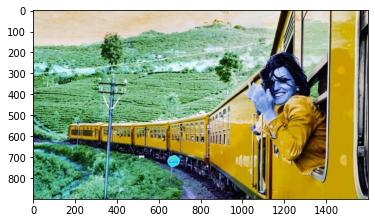

In [35]:
import skimage
import matplotlib.pyplot as plt
import wget
filename = wget.download(url)
img = cv2.imread(filename)
plt.imshow(img)
plt.show()

### 2.  Load the pre-trained weights
    Use the Mask RCNN Architecture and the pre-trained weights to generate predictions for 
    your own images or images from the COCO dataset

In [36]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(img)

In [37]:
outputs

{'instances': Instances(num_instances=4, image_height=900, image_width=1600, fields=[pred_boxes: Boxes(tensor([[1014.1702,  203.3015, 1398.9197,  855.0995],
         [ 157.7147,  231.1743, 1408.4062,  886.8401],
         [ 617.5991,  597.7452,  630.4365,  623.1992],
         [ 802.5759,  603.0480,  816.7340,  632.0169]], device='cuda:0')), scores: tensor([0.9950, 0.9879, 0.6308, 0.5308], device='cuda:0'), pred_classes: tensor([0, 6, 0, 0], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],
 
         [[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, Fals

### 4. Visualize the Results with Matplotlib’s image.imread method

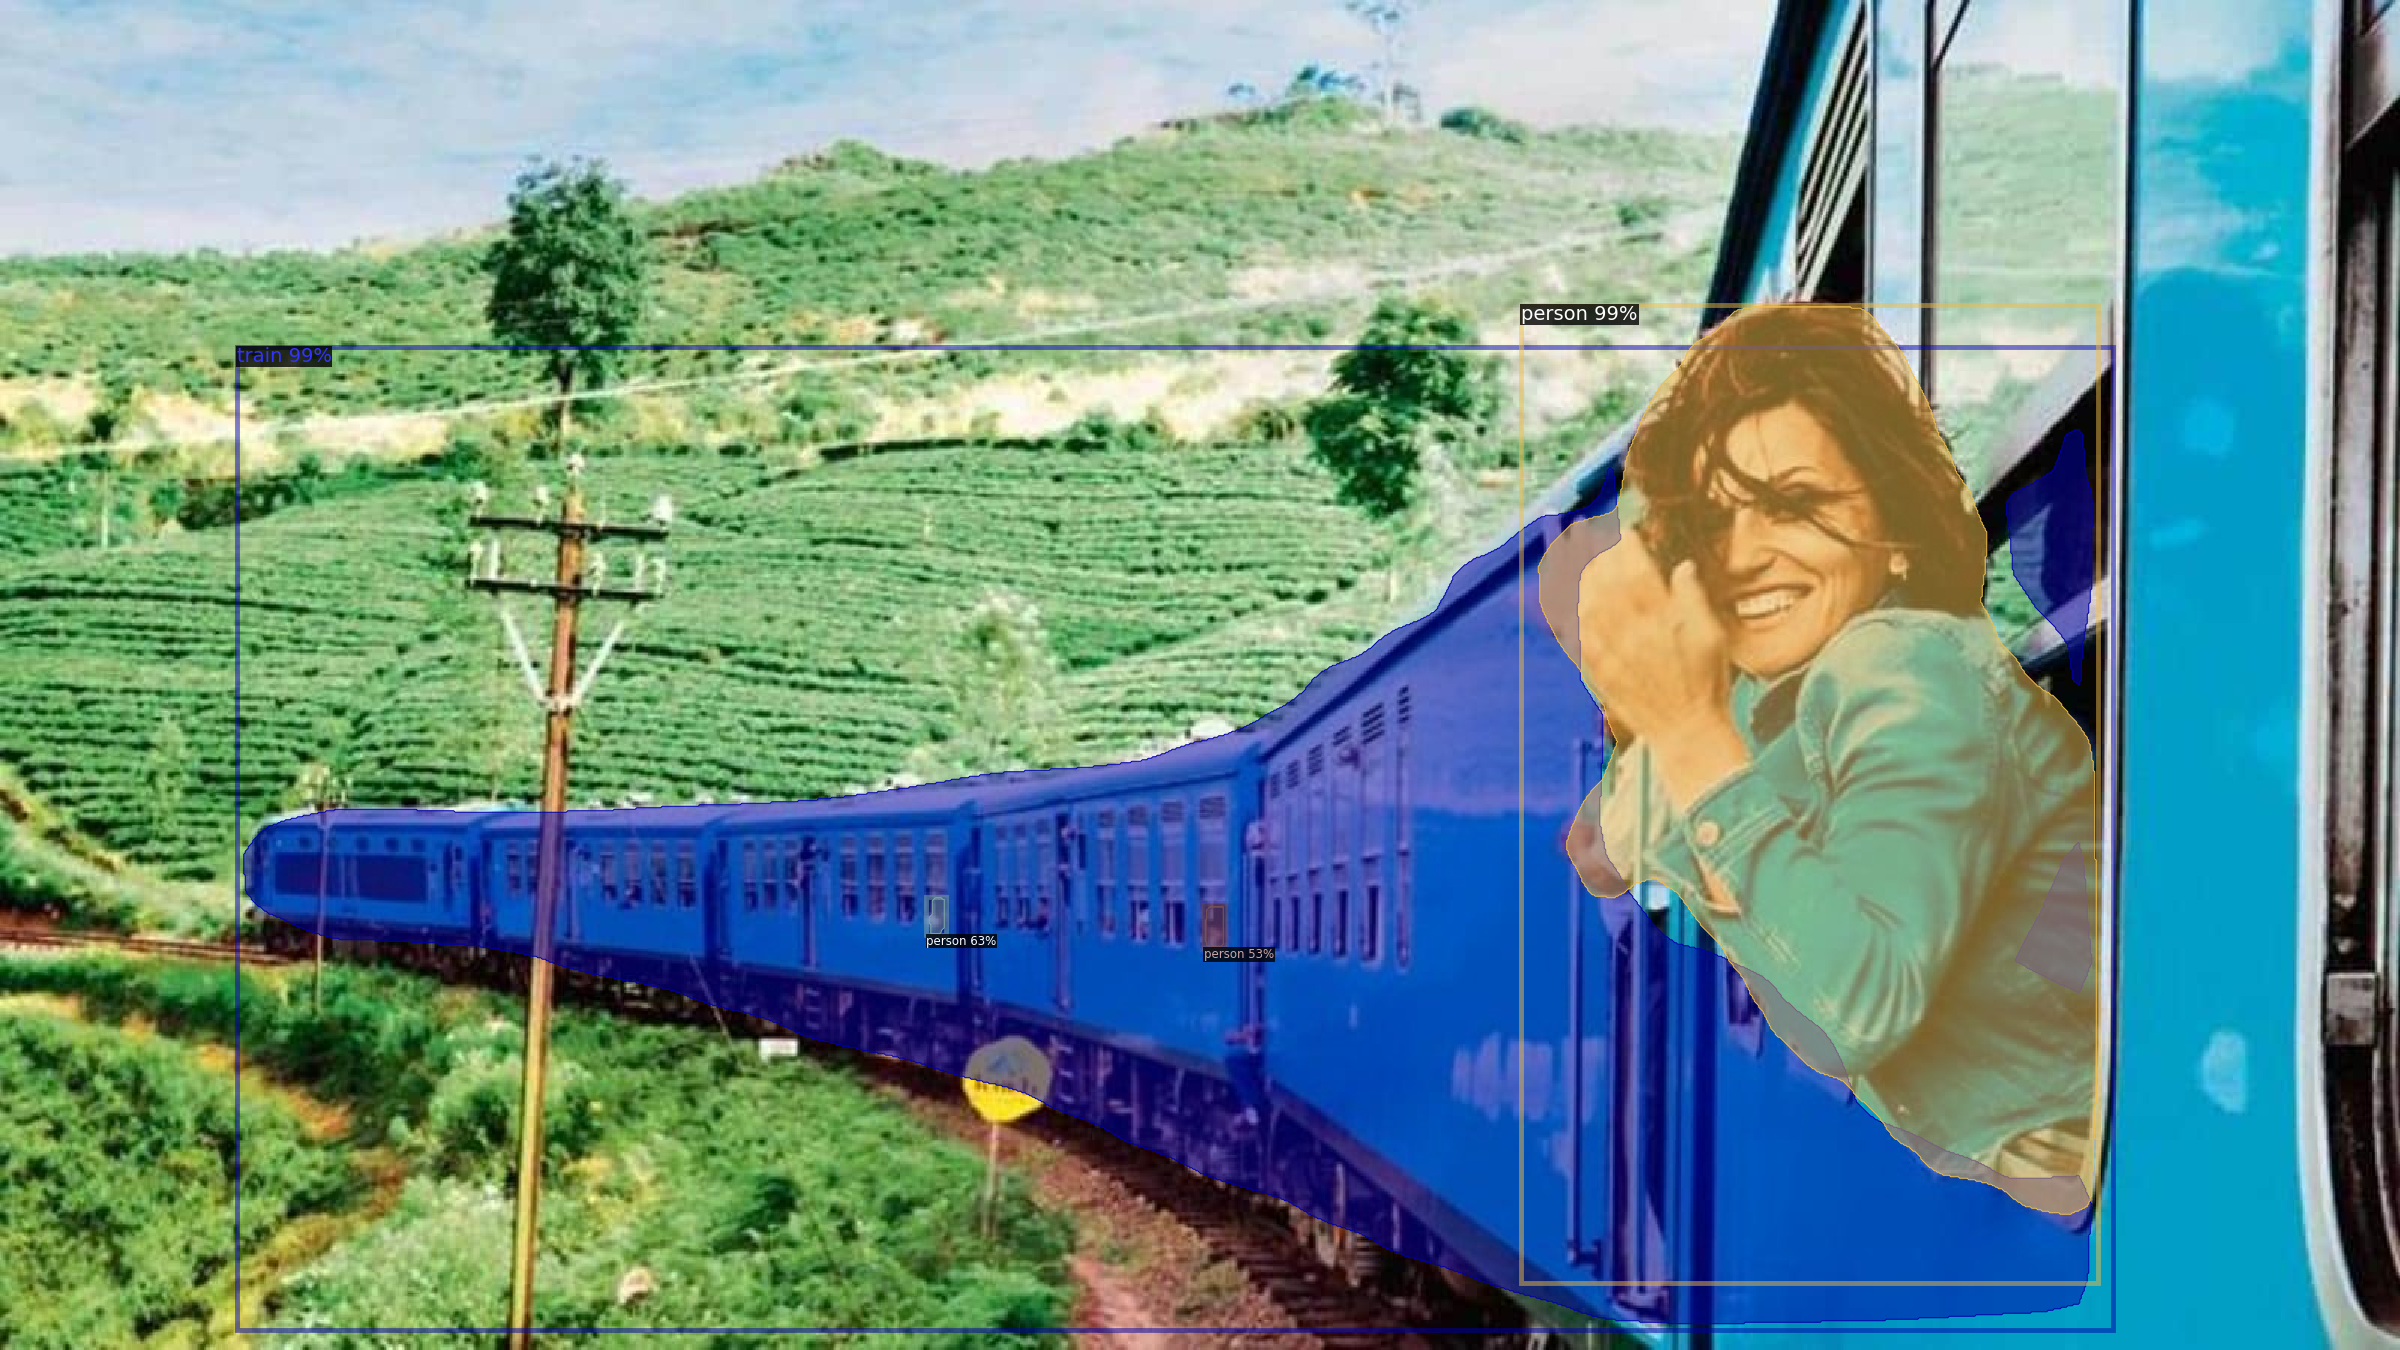

In [38]:
v = Visualizer(img, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.5) # Scaling the image 1.5 times, for big images consider a value below 0
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image())